# VOLUNTARIO LENNARD JONNES
## Teresa Puyol López



La simulación está programada en C (se irá haciendo referencia a los diferentes archivos a lo largo del informe), y las animaciones están realizadas en Python, recogidas en este archivo de Jupyter Notebook.  

Se realizarán comparativas entre mi portátil personal y el acceso a Joel. Para no repetir las características del ordenador contínuamente a lo largo de la práctica, se hará referencia a mi portatil personal como **RYZEN**, y el procesador es un AMD Ryzen 7 7730U, 8 cores.

Hechas las especificaciones, comenzamos con la realización de la práctica:

### 1

Simulamos 20 átomos del gas en una caja de 10 x 10, con posiciones iniciales aleatorias y velocidades de dirección aleatoria pero módulo 1.

El paso para la simulación es de $\Delta$ t = 0.02, y el tiempo de simulación es de 100.

Primero realizamos la animación para la evolución de las partículas:


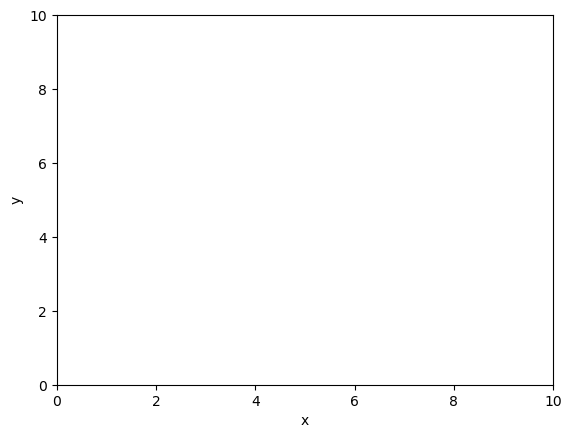

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation


data = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/datos_simulacion.txt')
N, L, h, T, Time = int(data[0]), data[1], data[2], data[3], data[4]

# Parámetros a adaptar
filename    = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/posiciones.txt"   # nombre de tu fichero              
interval_ms = 10                # tiempo entre frames en ms
output_mp4  = "C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/simulacion.mp4"   # nombre del fichero de salida

# --- 1) Leer y estructurar datos ---
# Cada bloque de N líneas, dos columnas x,y
data = np.loadtxt(filename)
n_frames = data.shape[0] // N

# reshaped: (n_frames, N, 2)
frames = data.reshape((n_frames, N, 2))

# --- 2) Preparar figura ---
fig, ax = plt.subplots()
scat = ax.scatter([], [], s=50)

# Ajusta límites en función de tus datos
ax.set_xlim( 0, L)
ax.set_ylim(0, L)
ax.set_xlabel('x'); ax.set_ylabel('y')

# Función de inicialización
def init():
    scat.set_offsets(np.empty((0,2)))
    return scat,


# Función que actualiza cada frame
def update(frame_idx):
    xy = frames[frame_idx]
    scat.set_offsets(xy)
    ax.set_title(f'Tiempo: frame {frame_idx+1}/{n_frames}')
    return scat,




# --- 3) Construir animación ---
anim = animation.FuncAnimation(fig, update,
                               frames=range(n_frames),
                               init_func=init,
                               interval=interval_ms,
                               blit=False)

# Mostrar por pantalla
plt.show()

# Guardar como vídeo mp4 (requiere ffmpeg instalado)
#anim.save(output_mp4, writer='ffmpeg', dpi=150)
#print(f'Vídeo guardado en {output_mp4}')

A continuación, haremos una gráfica donde estarán representadas la energía cinética, potencial y total:

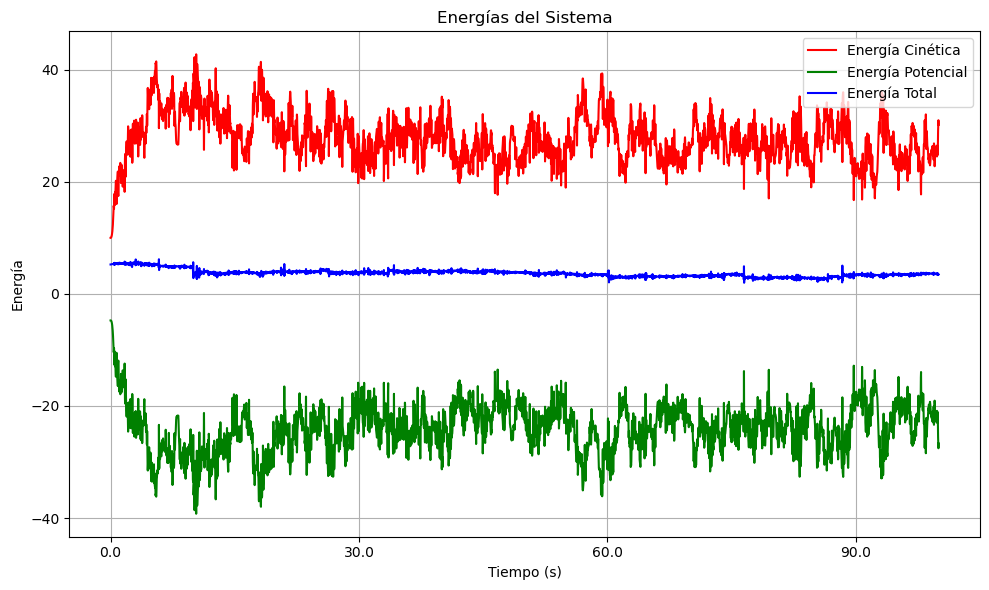

In [10]:
# Cargar los datos de energía
# Si el archivo tiene separadores por coma, cambia delimiter a ',' si es necesario
energia = np.loadtxt('C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/energia.txt')

# Separar columnas
ekin = energia[:, 0]  # Energía cinética
epot = energia[:, 1]  # Energía potencial
etot = energia[:, 2]  # Energía total

# Crear vector de tiempo / frames
frames = np.arange(len(energia))


# Graficar
plt.figure(figsize=(10, 6))
plt.plot(frames, ekin, label='Energía Cinética', color='r')
plt.plot(frames, epot, label='Energía Potencial', color='g')
plt.plot(frames, etot, label='Energía Total', color='b')

tiks = np.arange(0, (Time/h), 30/h)  # Cambia el paso según tus datos
plt.xticks(tiks, labels=np.arange(0,Time,30))
plt.title('Energías del Sistema')
plt.xlabel('Tiempo (s)')
plt.ylabel('Energía')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Mostrar el gráfico por pantalla
plt.show()

Podemos ver como la energía total se conserva, pero tiene como dos escalones alrededor de los segundos 10 y 80, esto puede deberse a errores de cálculo en la simulación.

A continuación, hacemos un histograma con las velocidades, y comprobamos si sigue la distribución de Maxwell, definida por la ecuación:

$P(V)\;=\;\left( \frac{m}{k_b T}\right) v e^{-\frac{m v^2}{2k_B T}}$

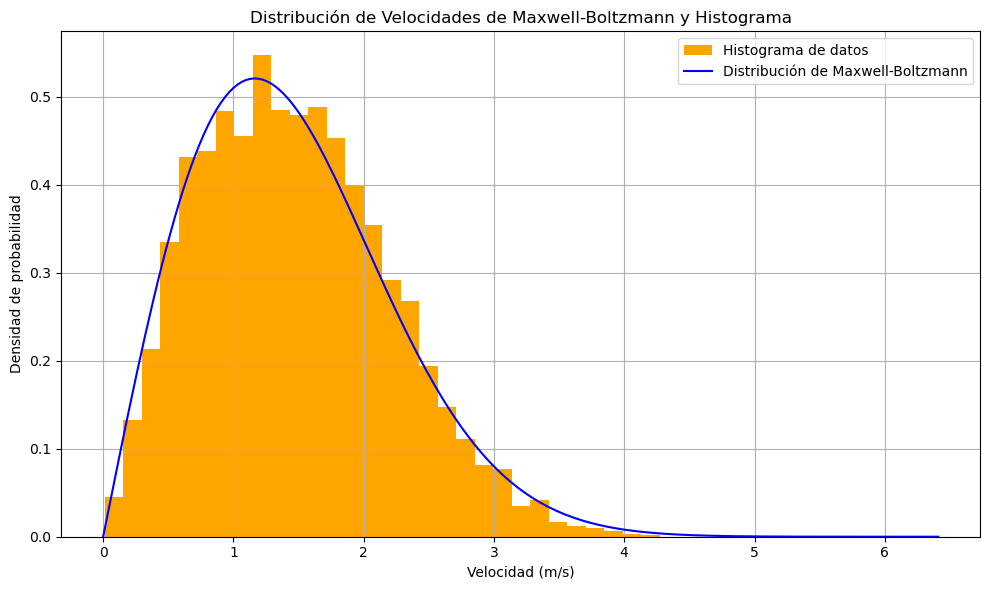

In [11]:


# Hacemos la ecuación de maxwell

import numpy as np
import matplotlib.pyplot as plt

def maxwell_boltzmann_distribution(v, T, m, kB):
    """Calcula la distribución de velocidades de Maxwell-Boltzmann."""
    factor = (m / (kB * T)) 
    return factor * v * np.exp(-m * v**2 / (2 * kB * T))

# Parámetros
m = 1  # Masa de la partícula en kg (ejemplo: masa de un átomo de hidrógeno)
kB = 1  # Constante de Boltzmann en J/K



# Leer datos del archivo
ruta_del_fichero = "c:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_1/velocidades.txt"
datos = np.loadtxt(ruta_del_fichero)

# Rango de velocidades
v = np.linspace(0, np.max(datos)*1.5, 200)  # Velocidades en m/s

# Calcular la distribución
P_v = maxwell_boltzmann_distribution(v, T, m, kB)

# Graficar
plt.figure(figsize=(10, 6))

# Histograma de los datos
plt.hist(datos, bins=30, density=True, alpha=1, color='orange', label='Histograma de datos')

# Distribución de Maxwell-Boltzmann
plt.plot(v, P_v, label='Distribución de Maxwell-Boltzmann', color='blue')

# Configuración de la gráfica
plt.title('Distribución de Velocidades de Maxwell-Boltzmann y Histograma')
plt.xlabel('Velocidad (m/s)')
plt.ylabel('Densidad de probabilidad')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Mostrar la figura
plt.show()


Parece que si sigue la distribución de Maxwell

### 2
Estudiamos lo que ocurre cuando el módulo de la velocidad inicial toma valores de 2,3, y 4.

También estudiamos que ocurre si le damos como velocidad inicial solo $v_x$ generada aleatoriamente entre 0 y 1, y $v_y = 0$

### 3

Ahora medimos la ecuación de estado con la presión y vemos la dependencia lineal entre el momento lineal y la temperatura

Pendiente: 0.0006437863293384766
Intercepto: -6.462533954926242e-05
Coeficiente de correlación de Pearson (r): 0.9994518222437173


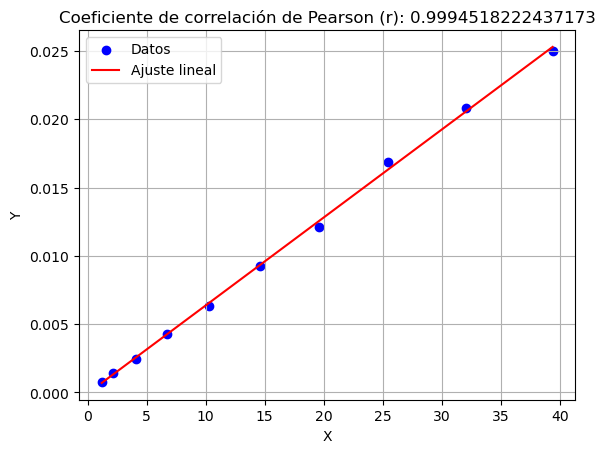

In [12]:
from scipy.stats import linregress

nombre_archivo = 'C:/Users/Teresa/Desktop/COMPU/Fisica_Computacional/Voluntario_Lenard_Jones/apartado_3/momentos.txt'

# Leer el archivo y cargar las columnas
datos = np.loadtxt(nombre_archivo, skiprows=1)  # Cambia el delimitador si es necesario
x = datos[:, 1]  # Primera columna
y = datos[:, 2]  # Segunda columna

# Realizar el ajuste lineal
pendiente, intercepto, r_value, p_value, std_err = linregress(x, y)

    # Mostrar resultados
print(f"Pendiente: {pendiente}")
print(f"Intercepto: {intercepto}")
print(f"Coeficiente de correlación de Pearson (r): {r_value}")

    # Graficar los datos y la línea ajustada
plt.scatter(x, y, label='Datos', color='blue')
plt.plot(x, pendiente * x + intercepto, color='red', label='Ajuste lineal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f"Coeficiente de correlación de Pearson (r): {r_value}")
plt.legend()
plt.grid()
plt.show()




### 4. Transición de fase sólido-líquido.

Ahora, simularemos 16 partículas en una caja de 4 x 4 comenzando con las partículas fijas en una cuadrícula, y estudiaremos lo mismo que en el apartado 1: las energías y el histograma de la velocidad.

Durante la simulación, podemos observar como, tras un cierto tiempo, las particulas se amontonan en forma de triangulos:

### 5

Demostrar que al disponer las partículas de otra forma se obtiene al cabo de cierto tiempo la estructura triangular 

### 6 

Ahora volvemos a disponer la estructura de cuadrícula del apartado 4, pero ahora vamos aumentando la velocidad por un factor 1.5 para los tiempos t = 20, 30, 35 y 45.

Con estos incrementos de velocidad, veremos como se pierde la estructura de sólido y estudiaremos las fluctuaciones de la posición inicial $\langle (r(t) - r(t=0))^2 \rangle $

### 7

Determinaremos la temperatura crítica incrementando la temperatura de nuevo, pero ahora en un factor de 1.5 cada 60 segundos de tiempo. Estudiaremos la fluctuación entre partículas con la ecuación $\langle (\Delta r_{i,j}(t))^2 \rangle $ = $\langle (r_i(t) - r_j(t))^2 \rangle $

La temperatura crítica será donde los átomos experimenten un alejamiento considerable y abrupto de sus posiciones